We will be looking at CIA Factbook data and draw conclusions from it using Python and SQL

In [1]:
import pandas as pd
import sqlite3
cs = sqlite3.connect('factbook.db')

cursor = cs.cursor()

q1 = "SELECT * FROM sqlite_master WHERE type='table';"
database_info = pd.read_sql_query(q1, cs)
database_info


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


We will now look at potentially interesting values from our dataset such as minimum and maximum population and population growth 

In [2]:
q2 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
data = pd.read_sql_query(q2, cs)
data.head()

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q3 = '''
SELECT * FROM facts 
WHERE population == (SELECT MAX(population) from facts);
'''
data = pd.read_sql_query(q3, cs)
data.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [5]:
q4 = '''
SELECT * FROM facts 
WHERE population == (SELECT MIN(population) from facts);
'''
data = pd.read_sql_query(q4, cs)
data.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


The minimum and maximum values of Antarctica and the World are outliers, so we can deliberately exclude them from our analysis 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q5 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT MIN(population) from facts)
AND population != (SELECT MAX(population) from facts)
'''

data = pd.read_sql_query(q5, cs)
data.head()

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49


Let's visualize some of our data such as population, population growth, and birth and death rate as a real-life intelligence agency may do to countries of interest to them

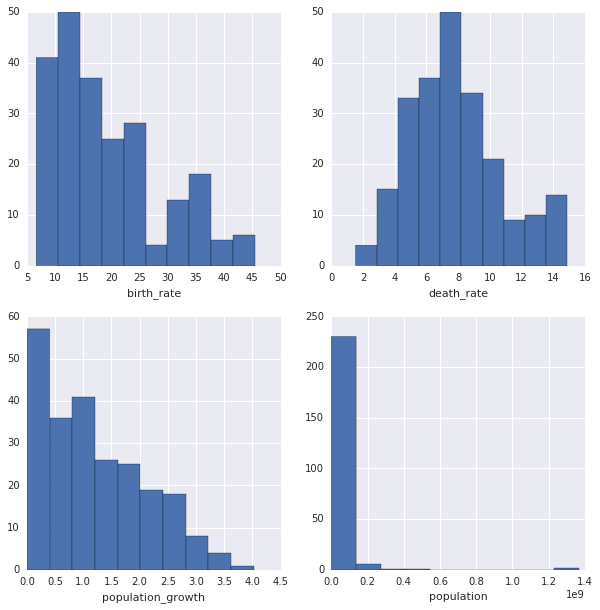

In [8]:
fig = plt.figure(figsize=(10,10))
p1 = fig.add_subplot(2,2,1)
p2 = fig.add_subplot(2,2,2)
p3 = fig.add_subplot(2,2,3)
p4 = fig.add_subplot(2,2,4)

data["birth_rate"].hist(ax=p1)
p1.set_xlabel("birth_rate")
data["death_rate"].hist(ax=p2)
p2.set_xlabel("death_rate")
data["population_growth"].hist(ax=p3)
p3.set_xlabel("population_growth")
data["population"].hist(ax=p4)
p4.set_xlabel("population")

plt.show()

Let's say we want to see who has the highest population density

In [9]:
q6 = '''
SELECT name, CAST(population as float)/CAST(area as float) "density"
FROM facts
WHERE population != (SELECT MIN(population) from facts)
AND population != (SELECT MAX(population) from facts)
ORDER BY density DESC
'''

data = pd.read_sql_query(q6, cs)
data.head()

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444


Macau has the highest population density. Now let's visualize our population densties, being mindful to avoid outliers

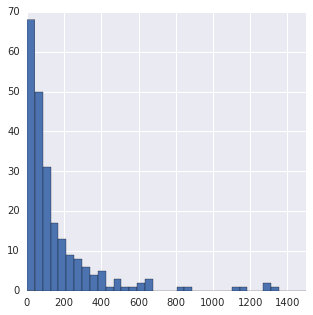

In [10]:
fig = plt.figure(figsize=(5,5))
p = fig.add_subplot(111)

data['density'].hist(bins=500)
p.set_xlim(0, 1500)
plt.show()